## Inspecting the effect of the number of Random Spanning Trees

Reproduce plots for the experiments varying the number of random spanning trees and comparison between max- and sum-margin, see Section 4.2.1 and Figure 2.

In [3]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from msmsrt_scorer.experiments.EA_Massbank.plot_and_table_utils import load_results

sys.path.append(".")
from local_utils import IDIR_CASMI, IDIR_EA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
param_selection_measure = "topk_auc"
eval_method = "casmi"
T_range = [1, 2, 4, 8, 16, 32, 64]
mode = "application"
make_order_prob = "sigmoid"

## Load the result files

Max-Margin

In [5]:
results_max = pd.DataFrame()
parsel_max = pd.DataFrame()

for i, T in enumerate(T_range):
    #########################
    # LOAD CASMI 2016 RESULTS
    #########################
    for _ionm, _maxn, _nsamp in [("positive", 75, 50), ("negative", 50, 50)]:
        _idir = IDIR_CASMI(
            tree_method="random", n_random_trees=T, ion_mode=_ionm, D_value_method=None,
            base_dir="../CASMI_2016/results__TFG__platt", mode=mode,
            param_selection_measure=param_selection_measure, make_order_prob=make_order_prob,
            norm_order_scores=False, margin_type="max")
    
        _tmp = load_results(_idir, "MS + RT", _maxn, method=eval_method, label_only_ms="Only MS",
                            n_samples=_nsamp, load_baseline=(i == 0))
        
        # Results
        _results = _tmp[0]
        _results["T"] = T
        _results["Ionization"] = _ionm
        _results["Dataset"] = "CASMI2016"
        _results["Margin"] = "Max"
        results_max = pd.concat([results_max, _results])
        
        # Optimal parameters
        _parsel = _tmp[1]
        _parsel["T"] = T
        _parsel["Ionization"] = _ionm
        _parsel["Dataset"] = "CASMI2016"
        _parsel["Margin"] = "Max"
        parsel_max = pd.concat([parsel_max, _parsel])

    ############################
    # LOAD EA (MASSBANK) RESULTS
    ############################
    for _ionm, _maxn, _nsamp in [("positive", 100, 100), ("negative", 65, 50)]:
        _idir = IDIR_EA(
            tree_method="random", n_random_trees=T, ion_mode=_ionm, D_value_method=None,
            base_dir="../EA_Massbank/results__TFG__platt", mode=mode,
            param_selection_measure=param_selection_measure, make_order_prob=make_order_prob,
            norm_scores="none", margin_type="max")
    
        _tmp = load_results(_idir, "MS + RT", _maxn, method=eval_method,
                            label_only_ms="Only MS", n_samples=_nsamp, load_baseline=(i == 0))
        # Results
        _results = _tmp[0]
        _results["T"] = T
        _results["Ionization"] = _ionm
        _results["Dataset"] = "EA"
        _results["Margin"] = "Max"
        results_max = pd.concat([results_max, _results])
        
        # Optimal parameters
        _parsel = _tmp[1]
        if _ionm == "positive":
            # Only consider 50 selected parameter examples this dataset to now skew the corresponding analysis
            _parsel = _parsel.iloc[:50, :].copy()
            
        _parsel["T"] = T
        _parsel["Ionization"] = _ionm
        _parsel["Dataset"] = "EA"
        _parsel["Margin"] = "Max"
        parsel_max = pd.concat([parsel_max, _parsel])

Sum-Margin

In [6]:
results_sum = pd.DataFrame()
parsel_sum = pd.DataFrame()

for i, T in enumerate(T_range):
    #########################
    # LOAD CASMI 2016 RESULTS
    #########################
    for _ionm, _maxn, _nsamp in [("positive", 75, 50), ("negative", 50, 50)]:
        _idir = IDIR_CASMI(
            tree_method="random", n_random_trees=T, ion_mode=_ionm, D_value_method=None,
            base_dir="../CASMI_2016/results__TFG__platt", mode=mode,
            param_selection_measure=param_selection_measure, make_order_prob=make_order_prob,
            norm_order_scores=False, margin_type="sum")
    
        _tmp = load_results(_idir, "MS + RT", _maxn, method=eval_method, label_only_ms="Only MS",
                            n_samples=_nsamp, load_baseline=(i == 0))
        # Results
        _results = _tmp[0]
        _results["T"] = T
        _results["Ionization"] = _ionm
        _results["Dataset"] = "CASMI2016"
        _results["Margin"] = "Sum"
        results_sum = pd.concat([results_sum, _results])
        
        # Optimal parameters
        _parsel = _tmp[1]
        _parsel["T"] = T
        _parsel["Ionization"] = _ionm
        _parsel["Dataset"] = "CASMI2016"
        _parsel["Margin"] = "Sum"
        parsel_sum = pd.concat([parsel_sum, _parsel])
    
    ############################
    # LOAD EA (MASSBANK) RESULTS
    ############################
    for _ionm, _maxn, _nsamp in [("positive", 100, 100), ("negative", 65, 50)]:
        _idir = IDIR_EA(
            tree_method="random", n_random_trees=T, ion_mode=_ionm, D_value_method=None,
            base_dir="../EA_Massbank/results__TFG__platt", mode=mode,
            param_selection_measure=param_selection_measure, make_order_prob=make_order_prob,
            norm_scores="none", margin_type="sum")
    
        _tmp = load_results(_idir, "MS + RT", _maxn, method=eval_method,
                            label_only_ms="Only MS", n_samples=_nsamp, load_baseline=(i == 0))
        # Results
        _results = _tmp[0]
        _results["T"] = T
        _results["Ionization"] = _ionm
        _results["Dataset"] = "EA"
        _results["Margin"] = "Sum"
        results_sum = pd.concat([results_sum, _results])
        
        # Optimal parameters
        _parsel = _tmp[1]
        if _ionm == "positive":
            # Only consider 50 selected parameter examples this dataset to now skew the corresponding analysis
            _parsel = _parsel.iloc[:50, :].copy()
        
        _parsel["T"] = T
        _parsel["Ionization"] = _ionm
        _parsel["Dataset"] = "EA"
        _parsel["Margin"] = "Sum"
        parsel_sum = pd.concat([parsel_sum, _parsel])

In [7]:
assert(results_max.shape[0] == ((50 + 50 + 50 + 100) * 7) + (50 + 50 + 50 + 100))
assert(results_sum.shape[0] == ((50 + 50 + 50 + 100) * 7) + (50 + 50 + 50 + 100))

## Top-K Accuracy

Here we are plotting the top-k accuracies against the number of spanning-trees used to approximate the probability distribution.

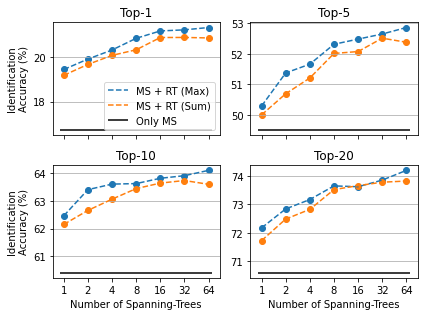

In [8]:
fig, axrr = plt.subplots(2, 2, figsize=(6, 4.5), sharex="all")

_res_melt_max = results_max \
    .drop(["sample", "Margin"], axis=1) \
    .melt(id_vars=["Ionization", "T", "Method", "Dataset"], var_name="Top-k", value_name="Top-k Accuracy (%)")
_res_melt_sum = results_sum \
    .drop(["sample", "Margin"], axis=1) \
    .melt(id_vars=["Ionization", "T", "Method", "Dataset"], var_name="Top-k", value_name="Top-k Accuracy (%)")

_xlabels = T_range
_x = range(len(_xlabels))

for i, topk in enumerate(["Top-%d" % k for k in [1, 5, 10, 20]]):
    r, c = np.unravel_index(i, shape=axrr.shape)
    ax = axrr[r, c] 
    
    # Plot average (RT + MS)
    _y = _res_melt_max \
        .loc[(_res_melt_max["Top-k"] == topk) & (_res_melt_max.Method != "Only MS")] \
        .groupby(["T", "Dataset", "Ionization"])["Top-k Accuracy (%)"].mean() \
        .groupby("T").mean()
    ax.plot(_x, _y, linestyle="--", label="MS + RT (Max)")
    ax.scatter(_x, _y)
    
    _y = _res_melt_sum \
        .loc[(_res_melt_sum["Top-k"] == topk) & (_res_melt_sum.Method != "Only MS")] \
        .groupby(["T", "Dataset", "Ionization"])["Top-k Accuracy (%)"].mean() \
        .groupby("T").mean()
    ax.plot(_x, _y, linestyle="--", label="MS + RT (Sum)")
    ax.scatter(_x, _y)
    
    # Plot average (Only MS)
    __y_max = _res_melt_max \
        .loc[(_res_melt_max["Top-k"] == topk) & (_res_melt_max.Method == "Only MS")] \
        .groupby(["Dataset", "Ionization"])["Top-k Accuracy (%)"].mean() \
        .mean()
    __y_sum = _res_melt_sum \
        .loc[(_res_melt_sum["Top-k"] == topk) & (_res_melt_sum.Method == "Only MS")] \
        .groupby(["Dataset", "Ionization"])["Top-k Accuracy (%)"].mean() \
        .mean()
    assert (__y_max == __y_sum)
    
    _y = __y_max
    ax.hlines(_y, -0.15, len(T_range) - 1 + 0.15, linestyle="-", color="black", label="Only MS")
    
    ax.set_title(topk)
    
    ax.grid(axis="y")
    
    if c == 0:
        ax.set_ylabel("Identification\nAccuracy (%)")
    
    if r == 0:
        ax.set_xticklabels([])
    else:
        ax.set_xticks(_x)
        ax.set_xticklabels(_xlabels)
        ax.set_xlabel("Number of Spanning-Trees")
    
    if i == 0:
        ax.legend(loc="lower right")
    
plt.tight_layout()